<span style="color:blue">Multidimensional Random Walk Version 12 June 2018 </span>

# <span style="color:blue"> Demonstration 3.1 </span>
Difference from Demonstration 3.0: Plots at end of execution - not during.   

###  <span style="color:blue"> Extract the probabilities of multiple outcomes using a multidimensional random walk model </span>

####  James B. Cole, James.Cole.ctr@afit.edu ***or*** james.b.cole.3142@gmail.com 
 

In [1]:
import math as m
import numpy as np
import random
import matplotlib.pyplot as plt

#### <span style="color:blue"> Input probability of each possible outcome </span>

In [2]:
#
P = [0.17,0.09,0.27,0.19]    # list of probabilities
#
if sum(P) > 1:
    print("Error: sum of probabilities =", sum(P), " must be less than or equal to 1 ")

#### <span style="color:blue"> Regularize list of probabilities </span>

<span style="color:blue">
In the random walk model outcome $o_{i\pm}$ corresponds to a step of distance $\pm 1$ in the $i^\rm{th}$ dimension $i$ ($i = 1,2,...,m$). If $O$ is odd $o_{m+1}$ can correspond to either a $0$ step, or a non-zero one in $2(m+1)$ dimensions.
</span>


Let $S_P = $ sum of the probabilities in list **P**. Let $n_P = $ number of probabilities in **P**. 

If $ S_P = 1 $ and $n_P = $ is odd, then the last probability is the probability that the step is $0$. <br/>

If $ S_P < 1 $ and  $n_P$ is odd, then we append $ q = 1 - S_P $ to the the list. $n_P$ becomes even, and there is no zero step. <br/>

If $ S_P = 1 $ and $n_P = $ is even, there is no zero step. <br/>

If $ S_P < 1 $ and  $n_P$ is even, then we append $ q = 1 - S_P $ to the the list, $n_P$ becomes odd and $q$ is the probability of a zero step. <br/>


In [3]:
#
if sum(P) < 1.0:
    q = 1.0 - sum(P)
    P.append(q)
#
print("regularized list of probabilities", P)

regularized list of probabilities [0.17, 0.09, 0.27, 0.19, 0.28]


In [4]:
nP = len(P)
mP = divmod(nP,2)[0]
#
print ("number of dimensions = ", mP)

number of dimensions =  2


#### <span style="color:blue"> create list of possible outcomes </span>
**Outcomes are string integers including "0" if needed** 

In [5]:
# create list of outcomes
#
list_of_outcomes = [str((i+1)%nP) for i in range(0,nP) ]   # nP is number of possible outcomes (excluding 0 step)
#
# list of weights (probabilities) for random choice function is P 
#
print("list of outcomes")
print(list_of_outcomes)
print ('their probabilites')
print(P)
                                    

list of outcomes
['1', '2', '3', '4', '0']
their probabilites
[0.17, 0.09, 0.27, 0.19, 0.28]


#### <span style="color:blue"> **Random Walk Theory** </span>
  
<span style="color:blue">
\begin{align}
\hspace{-5.0cm} <x_{i,t}>   & = ( p_{i+} - p_{i-} )t  \\
\hspace{-5.0cm} <x_{i,t}^2> & =  \left[ ( p_{i+} + p_{i-} ) - ( p_{i+} - p_{i-} )^2 \right] t + ( p_{i+} - p_{i-} )^2 t^2
\end{align}
</span>
    
<span style="color:blue"> thus </span>    
<span style="color:blue">
    
\begin{align}
\hspace{-7.50cm} <x_{i,t}>   & = a_i \, t,  \\
\hspace{-7.5cm} <x_{i,t}^2> & =  \left[ b_i - a_i^2 \right] t + a_i^2 \, t^2,
\end{align}
</span>

<span style="color:blue"> where  $a_i =  p_{i+} - p_{i-}$ and  $b_i =  p_{i+} + p_{i-}$    </span> 



#### <span style="color:blue"> **Probability Estimation 1** </span>
#### <span style="color:blue">  Estimate $p_{i\pm}$ using ensemble averaged position, $ <x_{i,t}> $ and $ <x_{i,t}^2> $ in dimension $i$ at step $t$. </span>   

<span style="color:blue">
\begin{equation*}
\hat{p}_{i\pm, t} = \frac{1}{2} \left\{ \frac{1}{t} \left[ <x_{i,t}^2> - <x_{i,t}>^2 \pm <x_{i,t}> \right] - 
\frac{1}{t^2}<x_{i,t}>^2 \right\}
\end{equation*}
</span> 

In [6]:
### probability estimation 1 ### 
#
def prob_theory1(mx,msqx,t):
#    
    dummy1 = ( msqx - mx**2 )/t - mx**2 / t**2
    dummy1 = 0.5*dummy1
    dummy2 = 0.5*mx /t
#    
    p_plus  = dummy1 + dummy2
    p_minus = dummy1 - dummy2
#
    return [p_plus, p_minus]   

#### <span style="color:blue"> define functions for probability estimation 2 </span>  

<span style="color:blue">
\begin{equation*}
\sum_{\tau =1}^t{\tau^2} = \frac{1}{6} t(t+1)(2t+1), \hspace{1cm} \sum_{\tau =1}^t{\tau^3} = \frac{1}{4} t^2(t+1)^2   \hspace{3cm}
\end{equation*}
</span>  

In [7]:
#### sum of squares ###
#
def Sum_t2(t):
    return t*(t+1.0)*(2.0*t+1.0) / 6.0
#
#### sum of cubes ###
#
def Sum_t3(t):
    return t**2 (t+1.0)**2 / 4.0

<span style="color:blue">
\begin{equation*}
\sum_{\tau =1}^t{ y_\tau \, \tau },   \hspace{5cm}
\end{equation*}
where $ y_\tau $ is either ensemble averaged position, $ <x_{i,t}> $, or ensemble averaged position squared,
$ <x_{i,t}^2> $, in dimension $i$ at step $t$. </span>   

In [8]:
### sum of y multiplied by t  ###
# in order to get a running estimate (as a function of t) t can be <= len(t)
# 
def Sum_yt(y,t):
    it = int(t)
    s = 0.0
    for i in range(0,it):
        s = s + (i+1.0)*y[i+1]
    return s

#### <span style="color:blue"> Probability Estimation 2 </span>  
<span style="color:blue">
Regression estimate of $\hat{a}_i$
\begin{equation*}
\hspace{-3.5cm}  \hat{a}_i = \frac{  \sum_{\tau =1}^t { <x_{i,\tau}> \tau } }{ \sum_{\tau =1}^t {\tau^2} }
          = \frac{ 6 \sum_{\tau =1}^t { <x_{i,\tau}> \tau } }{ t(t+1)(2t+1) },   \hspace{5cm} 
\end{equation*}
</span>
<span style="color:blue">
Regression estimate of $\hat{b}_i$
\begin{equation*}
\hspace{1.5cm} \hat{b}_i = \hat{a}_i^2 \left[ 1 -  \frac{  \sum_{\tau =1}^t { \tau^3 } }{ \sum_{\tau =1}^t {\tau^2} } \right] 
          +  \frac{  \sum_{\tau =1}^t { <x_{i,\tau}^2> \tau } }{ \sum_{\tau =1}^t {\tau^2} }  
          =  \hat{a}_i^2 \left[ 1 - \frac{3}{2} \frac{t(t+1)}{(2t+1)} \right]    + \frac{6}{t(t+1)(2t+1)} 
          \sum_{\tau =1}^t { <x_{i,\tau}^2> \tau  }  
\end{equation*}
</span>   
<span style="color:blue">
Estimate of probability pair in dimension $i$
\begin{equation*}
\hspace{-8.2cm}  \hat{p}_i\pm = \frac{ \hat{b}_i \pm \hat{a}_i }{2}
\end{equation*}
</span>

In [9]:
### regression estimate of a_i using all steps up to and including time t. ###   
#
def est_a_i(y,t):
    num = Sum_yt(y,t)
    den = Sum_t2(t)
    return num / den
###
#
### regression estimate of b_i using all steps up to and including time t. ###   
#
def est_b_i(y1,y2,t):
    asq = est_a_i(y1,t)**2
    term1 = asq*(1.0 - 1.5*t*(t+1.0)/(2*t+1.0) ) 
    sy2sq = Sum_yt(y2,t)
    term2 = sy2sq / Sum_t2(t)
#
    return (term1 + term2)
#
def prob_theory2(mx,msqx,t):
    duma = est_a_i(mx,t)
    dumb = est_b_i(mx,msqx,t)
    p_plus  = (dumb + duma) / 2.0
    p_minus = (dumb - duma) /2.0
#    
    return [p_plus, p_minus]     

#### <span style="color:blue"> **Random Walk Theory** </span>  
#### <span style="color:blue">  Ensemble averaged position = $ <x_{i,t}> $ and ensemble averaged position squared = $ <x_{i,t}^2> $ in dimension $i$ at step $t$. </span>   


<span style="color:blue"> 
\begin{equation*}
<x_{i,t}> = ( p_{i+} - p_{i-} )\, t, \hspace{1cm} <x_{i,t}^2> = 
\left[ ( p_{i+} + p_{i-} ) -  ( p_{i+} - p_{i-} )^2 \right] \,t + ( p_{i+} - p_{i-} )^2 \, t^2 \hspace{1cm}
\end{equation*}
</span> 

In [10]:
###
#
def walk_theory_x(p_plus,p_minus,t):
#    
    x_ensAve = (p_plus - p_minus)*t
#
    return x_ensAve
#
###
#
def walk_theory_xsq(p_plus,p_minus,t):
#    
    difp =p_plus - p_minus
    sump =p_plus + p_minus
#
    xsq_ensAve = (sump - difp**2)*t + (difp**2)*t**2   
#
    return xsq_ensAve

<span style="color:blue">
$x_i$ are coordinates in **mP**-dimensional space, **mP** determined from regularized list of probabilities. 
</span>

In [11]:
Lzero = [0.0 for i in range(0,mP)]   # list needed in certain places
zero = np.array(Lzero)               # array  
#
print ("zero =", zero,  "is a ", mP, "-dimensional vector")

zero = [0. 0.] is a  2 -dimensional vector


####  <span style="color:blue"> define an ensemble: **nE** trials, with **nP** possible outcomes </span>

In [12]:
### define an ensemble of outcomes ###
#
def Ensemble(E):
    D = [] # initialize data list
    D = random.choices(list_of_outcomes, weights = P, k = E)
    return D
#
# Output is a list of string integers, from 0 to nP    

In [13]:
# test Ensemble function
print ("example output of ensemble function")
print( Ensemble(7) )

example output of ensemble function
['0', '4', '3', '2', '0', '3', '1']


<span style="color:blue"> Transform data from **Ensemble** into a step in **mP**-dimensional random walk </span>

In [14]:
# x is a string number
#
def fs(x):   
    x = int(x)
    if x == 0:
        return 0
    if x != 0:
        return (-1)**(x+1)
#

#### <span style="color:blue"> An outcome is converted into a single step. Dimension in which the step occurs depends on the outcome. </span>

In [15]:
# x is a string number 
#
def step_component(x):
    if x == '0':
        return zero
    if x != '0':
        step = zero.tolist()
        x = int(x)
        q = x - 1
        d = divmod(q, mP)[0]
        y = (-1)**(x+1)
        step[d] = y
        step = np.array(step)
        return step
#
# the output of step_component is an mP-dimensional vector

In [16]:
# enable for validation pursoses #
#
#test step_component: input a string integer
print("Examples:")
print('outcome = string(2) gives vector step', step_component('2'), 'in dimension 1' )
print('outcome = string(3) gives vector step', step_component('3'), 'in dimension 2' )
print('outcome = string(0) gives vector step', step_component('0'), 'in all dimensions' )

Examples:
outcome = string(2) gives vector step [-1.  0.] in dimension 1
outcome = string(3) gives vector step [0. 1.] in dimension 2
outcome = string(0) gives vector step [0. 0.] in all dimensions


In [17]:
# Ensemble of mP-dimensional steps
#
def EnsembleStep(D):
    nD = len(D)
    Zero = [Lzero for i in range(0,nD)] 
    step = Zero
#
    step = [ step_component(D[i]) for i in range(0,nD) ]
    step = np.array(step)
    return step

In [18]:
# enable for validation pursoses #
#
print("an ensemble of 4 outcomes is converted into 4 vector steps")
print()
#
print("ensemble of 4 outcomes")
test_ensemble = Ensemble(4)
print(test_ensemble)
print()
#
print("convert outcomes into 4 mP-dimensional vector steps")
test_ensemble = EnsembleStep(test_ensemble)
test_ensemble = test_ensemble.tolist()       # convert to list for display
print(test_ensemble)
#

an ensemble of 4 outcomes is converted into 4 vector steps

ensemble of 4 outcomes
['1', '1', '3', '0']

convert outcomes into 4 mP-dimensional vector steps
[[1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]]


In [19]:
### ensemble average ###
#
# outputs a single mP-dimensional vector
#
def EnsAve(x):             # x is the output of Ensemble(nE)
    nE = len(x)
    fnE = float(nE)
    ave = zero
    for i in range(0,nE):
        ave = ave + x[i]
    ave = ave / fnE
    ave = ave.tolist()
    return ave

In [20]:
### Enable for Validation Purposes ###
#
print("an ensemble of 4 outcomes is converted into 4 vector steps, and the ensemble average is computed")
print()
#
print("ensemble of 4 outcomes")
test_ensemble = Ensemble(4)
print(test_ensemble)
print()
#
print("convert outcomes into 4 mP-dimensional vector steps")
test_ensemble = EnsembleStep(test_ensemble)
test_ensemble_average = EnsAve(test_ensemble)
test_ensemble = test_ensemble.tolist()       # convert to list for display
print(test_ensemble)
#
print()
print("compute ensemble average from ensemble of step position vectors after one step")
print(test_ensemble_average)


an ensemble of 4 outcomes is converted into 4 vector steps, and the ensemble average is computed

ensemble of 4 outcomes
['2', '2', '4', '2']

convert outcomes into 4 mP-dimensional vector steps
[[-1.0, 0.0], [-1.0, 0.0], [0.0, -1.0], [-1.0, 0.0]]

compute ensemble average from ensemble of step position vectors after one step
[-0.75, -0.25]


<span style="color:blue"> Set number of ensemble members (**nE**) </span>

In [21]:
nE = 1024
fnE = float(nE)

####  <span style="color:blue">Initialization </span>

**Take the first step, and initialize lists of position and mean square position** <br\>
<span style="color:blue">
$ X(t) = [x_1(t),x_2(t),...,x_m(t)]=$ positions 
    in $m$-dimensional random walk at step $t$.
</span>

In [22]:
### Initialize Step 0
#                                         # zero is an initial mP-dimensional position vector
X = [zero for i in range(0,nE)]           # ensemble of mP-dimensional position vectors
X = np.array(X)
#
EnsAvX   = [ Lzero ]  # initial ensemble average of x   in each dimension
EnsAvXsq = [ Lzero ]  # initial ensemble average of x^2 in each dimension
#

####  <span style="color:blue"> set number of steps to run </span>

In [23]:
nT = 16

####  <span style="color:blue"> Enter iteration loop. Re-run to add more steps.  </span>

In [28]:
it = 1  # this allows you to add nT more steps
#
while it <= nT:
#    
    DeltaX = EnsembleStep(Ensemble(nE))
    X = X + DeltaX
    Xsq = X**2
#
    dummy1 = EnsAve(X)  
    EnsAvX.append(dummy1)
#
    dummy2 = EnsAve(Xsq)  
    EnsAvXsq.append(dummy2)
#
    it  = it + 1

#### <span style="color:blue">select which probability pair you want to extract </span>
dimension = dim = 1,2, ...mP

In [25]:
print('number of dimensions =', mP)
#
dim = 1     # set dim = 1,2, ... mP
d = dim-1


number of dimensions = 2


####  <span style="color:blue"> Plot the position and root mean square position and compare with random walk theory. </span>

dimension = 1


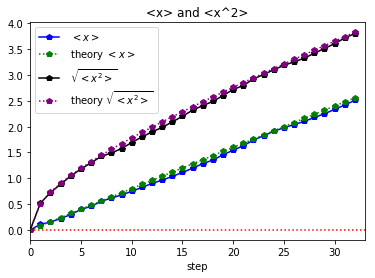

In [29]:
# Plot walk position and its root mean sqaure in dimension dim, and compare with random walk theory
#
T = len(EnsAvX)
#
## Random Walk Theory ##
#
# sequence of theoretical random walk calculations, <x>
theoryX =    [walk_theory_x(P[2*d],P[2*d + 1],float(i)) for i in range(0,T)]
#
# sequence of theoretical random walk calculations, <x^2>
theoryXsq =  [walk_theory_xsq(P[2*d],P[2*d + 1],float(i)) for i in range(0,T) ]
#
# compute root mean square 
theoryXrms = np.sqrt(theoryXsq)
#
## Calculations of <x> and <x^2> from data
#
# sequence of ensemble averages of  <x>
EnsAvX_d =    [EnsAvX[i][d]   for i in range(0, T) ]
#
# sequence of ensemble ensemble averages of <x^2>
EnsAvXsq_d =  [ EnsAvXsq[i][d] for i in range(0, T) ]
#
# compute root mean square 
EnsAvXrms_d = np.sqrt(EnsAvXsq_d)
#
#
print( 'dimension =', dim )   
#
plt.title('<x> and <x^2>')
#
plt.xlim(0, T)
#                                           
#
plt.plot(EnsAvX_d,  marker = "p",  linestyle = "-", color = "b", label= ' $ <x> $  ')
plt.plot(theoryX,   marker = "p",  linestyle = ":", color = "g", label= ' theory $ <x> $  ')
#
plt.plot(EnsAvXrms_d, marker = "p",  linestyle = "-", color = "k", label= ' $ \sqrt{<x^2>} $')
plt.plot(theoryXrms,  marker = "p",  linestyle = ":", color = "purple", label= ' theory $ \sqrt{<x^2>} $') 
#
plt.axhline(y = 0.0,  color = "r", linestyle = ":")
#
plt.xlabel('step')
#
plt.legend(loc = 'upper left')
#
plt.show()

####  <span style="color:blue"> Plot the probability estimates as a function of step </span>

dimension =  1   steps =  33

true p_+ =  0.17  estimate1 = 0.164  estimate2 = 0.167

true p_- =  0.09  estimate1 = 0.085  estimate2 = 0.089


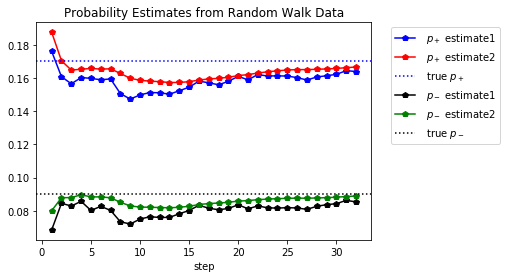

In [30]:
# Plots of the Probability Estimates
#
### esimation method 1 ###
#
est1P =[ prob_theory1(EnsAvX_d[i+1],EnsAvXsq_d[i+1], float(i+1) ) for i in range(0,T-1) ]
#
est1_p_plus  = [ est1P[i][0] for i in range(0,T-1) ]
est1_p_minus = [ est1P[i][1] for i in range(0,T-1) ]
#
###
#
### esimation method 2 ###
#
est2P =[ prob_theory2(EnsAvX_d,EnsAvXsq_d, float(i+1)) for i in range(0,T-1) ]                                                                       
#
est2_p_plus  = [ est2P[i][0] for i in range(0,T-1) ]
est2_p_minus = [ est2P[i][1] for i in range(0,T-1) ]
##
#
true_p_plus =  P[2*d]
true_p_minus = P[2*d+1]  
#
last_est1_p_plus  = round(est1_p_plus[T-2],3)
last_est1_p_minus = round(est1_p_minus[T-2],3)
#
last_est2_p_plus  = round(est2_p_plus[T-2],3)
last_est2_p_minus = round(est2_p_minus[T-2],3)
#                                              
plt.title('Probability Estimates from Random Walk Data')
#
print('dimension = ', dim, "  steps = ", T)
print()
print('true p_+ = ', true_p_plus,  ' estimate1 =', last_est1_p_plus,  ' estimate2 =', last_est2_p_plus)
print()
print('true p_- = ', true_p_minus, ' estimate1 =', last_est1_p_minus, ' estimate2 =', last_est2_p_minus)   
#
r = [i+1 for i in range(0, T-1) ]
#
plt.plot(r, est1_p_plus,  marker = "p",  linestyle = "-", color = "b", label= ' $ p_+ $ estimate1' )
plt.plot(r, est2_p_plus,  marker = "p",  linestyle = "-", color = "r", label= ' $ p_+ $ estimate2' )
plt.axhline(y = true_p_plus,  color = "b", linestyle = ":", label=' true $ p_+ $')
#
plt.plot(r, est1_p_minus, marker = "p",  linestyle = "-", color = "k", label= ' $ p_- $ estimate1' )
plt.plot(r, est2_p_minus, marker = "p",  linestyle = "-", color = "g", label= ' $ p_- $ estimate2' )
plt.axhline(y = true_p_minus, color = "k", linestyle = ":", label=' true $ p_- $') 
#
plt.xlabel('step')
#
plt.legend(bbox_to_anchor = (1.4, 1.0))
#
#plt.savefig('probabilities.png', dpi = 200, bbox_inches = 'tight', pad_inches = 2.0)
#
plt.show()